In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [6]:
def sequential_test(data, f0, f1, alpha=0.05, beta=0.2, verbose=True):
    """
    Выполняет последовательное тестирование (Sequential Testing) с использованием теста вероятностного отношения.
    
    Параметры:
      data: массив наблюдений (последовательность данных)
      f0: функция, вычисляющая вероятность наблюдения при H0 (принимает наблюдение x и возвращает f0(x))
      f1: функция, вычисляющая вероятность наблюдения при H1 (принимает наблюдение x и возвращает f1(x))
      alpha: уровень значимости (ошибка первого рода)
      beta: вероятность ошибки второго рода (то есть мощность = 1 - beta)
      verbose: если True, выводит информацию о ходе тестирования для каждого наблюдения
      
    Возвращает:
      decision: строка "H0", "H1" или "No decision" (если ни одна из границ не была достигнута)
      n: количество использованных наблюдений
      log_likelihood_ratio: конечное значение логарифма отношения правдоподобий
      history: список значений логарифма отношения правдоподобий после каждого наблюдения
    """
    # Вычисляем логарифмические границы для принятия решения
    upper_bound = np.log((1 - beta) / alpha)
    lower_bound = np.log(beta / (1 - alpha))
    
    log_lr = 0.0
    history = []
    
    for i, x in enumerate(data, start=1):
        delta = np.log(f1(x)) - np.log(f0(x))
        log_lr += delta
        history.append(log_lr)
        
        if verbose:
            print(f"Наблюдение {i}: log(LR) = {log_lr:.4f}")
        
        if log_lr >= upper_bound:
            if verbose:
                print(f"Принято решение в пользу H1 на {i}-ом наблюдении (log(LR) >= {upper_bound:.4f}).")
            return "H1", i, log_lr, history
        elif log_lr <= lower_bound:
            if verbose:
                print(f"Принято решение в пользу H0 на {i}-ом наблюдении (log(LR) <= {lower_bound:.4f}).")
            return "H0", i, log_lr, history
            
    if verbose:
        print("Решение не принято. Достигнут конец выборки без пересечения границ.")
    return "No decision", len(data), log_lr, history

In [7]:
def simulate_sequential_test(mu0, mu1, sigma, n, alpha=0.05, beta=0.2, true_state="H0", random_seed=None):
    """
    Симулирует последовательное тестирование на данных, сгенерированных из нормального распределения.
    
    Параметры:
      mu0: математическое ожидание при H0
      mu1: математическое ожидание при H1
      sigma: стандартное отклонение (предполагается, что оно общее для обеих гипотез)
      n: максимальное количество наблюдений для симуляции
      alpha: уровень значимости (ошибка первого рода)
      beta: вероятность ошибки второго рода
      true_state: строка "H0" или "H1" – истинное состояние, по которому будут сгенерированы данные
      random_seed: (опционально) для воспроизводимости симуляции
      
    Возвращает:
      decision, n_used, log_lr, history – результаты, полученные функцией sequential_test.
      
    Также строится график изменения логарифма отношения правдоподобий.
    """
    if random_seed is not None:
        np.random.seed(random_seed)
        
    if true_state == "H0":
        data = np.random.normal(mu0, sigma, n)
    elif true_state == "H1":
        data = np.random.normal(mu1, sigma, n)
    else:
        raise ValueError("Параметр true_state должен быть 'H0' или 'H1'.")
    
    def f0(x):
        return norm.pdf(x, loc=mu0, scale=sigma)
    
    def f1(x):
        return norm.pdf(x, loc=mu1, scale=sigma)
    
    decision, n_used, log_lr, history = sequential_test(data, f0, f1, alpha=alpha, beta=beta, verbose=True)
    
    plt.figure(figsize=(10, 6))
    plt.plot(history, marker='o', label='log(LR)')
    plt.axhline(np.log((1 - beta) / alpha), color='green', linestyle='--', label='Граница в пользу H1')
    plt.axhline(np.log(beta / (1 - alpha)), color='red', linestyle='--', label='Граница в пользу H0')
    plt.xlabel('Номер наблюдения')
    plt.ylabel('Логарифм отношения правдоподобий')
    plt.title('Динамика log(LR) в последовательном тестировании')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return decision, n_used, log_lr, history

Симуляция последовательного теста для истинного состояния H1:
Наблюдение 1: log(LR) = 0.9967
Наблюдение 2: log(LR) = 1.3584
Наблюдение 3: log(LR) = 2.5061
Наблюдение 4: log(LR) = 4.5292
Принято решение в пользу H1 на 4-ом наблюдении (log(LR) >= 2.7726).


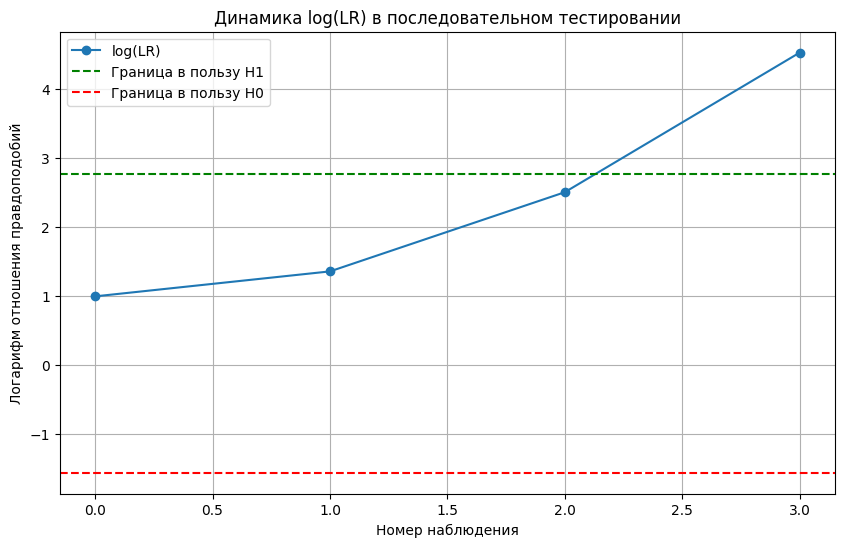


Симуляция последовательного теста для истинного состояния H0:
Наблюдение 1: log(LR) = -0.0033
Наблюдение 2: log(LR) = -0.6416
Наблюдение 3: log(LR) = -0.4939
Наблюдение 4: log(LR) = 0.5292
Наблюдение 5: log(LR) = -0.2050
Наблюдение 6: log(LR) = -0.9391
Наблюдение 7: log(LR) = 0.1401
Наблюдение 8: log(LR) = 0.4075
Наблюдение 9: log(LR) = -0.5619
Наблюдение 10: log(LR) = -0.5194
Наблюдение 11: log(LR) = -1.4828
Наблюдение 12: log(LR) = -2.4485
Принято решение в пользу H0 на 12-ом наблюдении (log(LR) <= -1.5581).


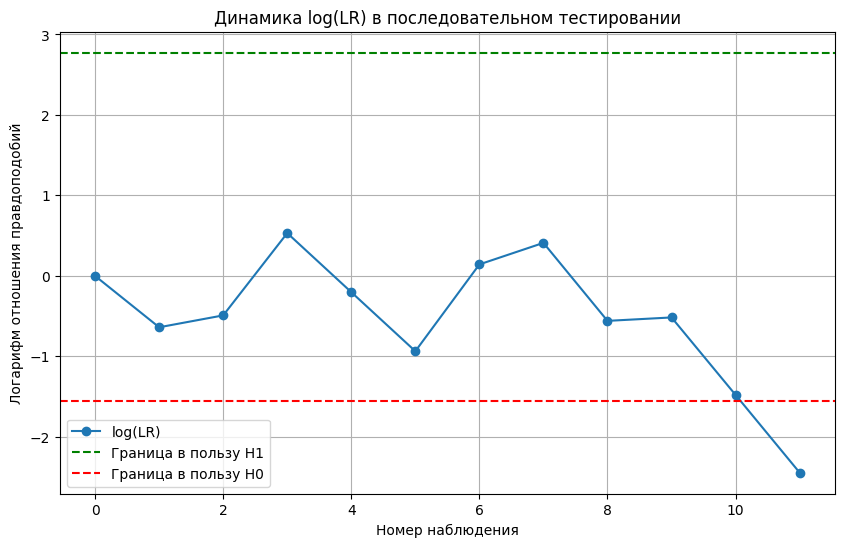

In [8]:
if __name__ == '__main__':
    # Настройки для симуляции
    mu0 = 0       # H0: среднее значение 0
    mu1 = 1       # H1: среднее значение 1
    sigma = 1     # Общее стандартное отклонение
    n = 100       # Максимальное количество наблюдений
    
    print("Симуляция последовательного теста для истинного состояния H1:")
    simulate_sequential_test(mu0, mu1, sigma, n, alpha=0.05, beta=0.2, true_state="H1", random_seed=42)
    
    print("\nСимуляция последовательного теста для истинного состояния H0:")
    simulate_sequential_test(mu0, mu1, sigma, n, alpha=0.05, beta=0.2, true_state="H0", random_seed=42)